In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.widgets import Cursor
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from scipy.stats import norm
from sympy import *
plt.rcParams.update({'font.size': 12})
formatter = mticker.ScalarFormatter(useMathText=True)
plt.rcParams["axes.formatter.use_mathtext"] = True

In [2]:
c = 299792458
h = 4.135668e-15
d = 2.82e-10
gauss_nacl = pd.read_csv('./Dados2/nacl_sem.csv',sep='\s', decimal=',')
gauss_nacl_sem_x = np.array(gauss_nacl['Ângulo'])
gauss_nacl_sem_y = np.array(gauss_nacl['R'])
gauss_nacl_x_sem_e = 1e-3 * h*c/(2*d*np.sin(gauss_nacl_sem_x * np.pi/180))

gauss_nacl = pd.read_csv('./Dados2/nacl_mo.csv',sep='\s', decimal=',')
gauss_nacl_x = np.array(gauss_nacl['Ângulo'])
gauss_nacl_y = np.array(gauss_nacl['R'])
gauss_nacl_x_e = 1e-3 * h*c/(2*d*np.sin(gauss_nacl_sem_x * np.pi/180))
gauss_nacl_y_abs = np.divide(gauss_nacl_sem_y, gauss_nacl_y)

C:\Users\victo\AppData\Local\Temp\ipykernel_12672\2305590895.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  gauss_nacl = pd.read_csv('./Dados2/nacl_sem.csv',sep='\s', decimal=',')
C:\Users\victo\AppData\Local\Temp\ipykernel_12672\2305590895.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  gauss_nacl = pd.read_csv('./Dados2/nacl_mo.csv',sep='\s', decimal=',')


In [3]:
# Dados para o plot
y_ln_a = np.log(gauss_nacl_y_abs)

In [4]:
def func(x, g, b):
    return -g*(x) + b

def func_fit(dados_x, dados_y):
    popt, pcov = curve_fit(
    f = func,
    xdata = dados_x,
    ydata = dados_y,
    maxfev=100000
    )
    return [popt, np.sqrt(np.diag(pcov))]

In [14]:
gauss_nacl_y

array([  5.1,   4.8,   4. ,   3.4,   4.1,   4.3,   4.9,   3.3,   6.8,
         7.7,  12.3,  28.9,  46.2,  56.1,  59.8,  65.6,  60.2,  55.3,
        46.4,  44. ,  36.6,  30.2,  25.5,  20.4,  17.6,  14.2,  14.3,
        13. ,   9.3,   7.6,   7.3,   6.8,   5.1,   6.4,   5.7,   5.7,
        18.8,  58. , 158.3, 264.1, 307.9, 209.8, 108.3,  95.4,  87.8,
       123.1, 243.4, 359.3, 394.5, 242.8,  73. ,  47.7,  40.4,  39.4,
        34.1,  31.7,  30.1,  27. ,  23.2,  19.2,  23.1,  19.9,  18.9,
        18.3,  16.2,  16.9,  14.2,  12.2,  13.5,  12.6,  10.7,  11.6,
        13.2,  11.3,  10.9,  10. ,   9.7,  11.3,  12.4,   9.5,  11.9,
         9.6,  10.4,  10.8,   8.9,  11.9,  10. ,   8.4,   9.6,   9.5,
         9.5,   8.8,   9.6,  10.1,   9.9,   9.4])

In [17]:
np.argmax(gauss_nacl_y_abs)

32

In [6]:
len(gauss_nacl_y)

96

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


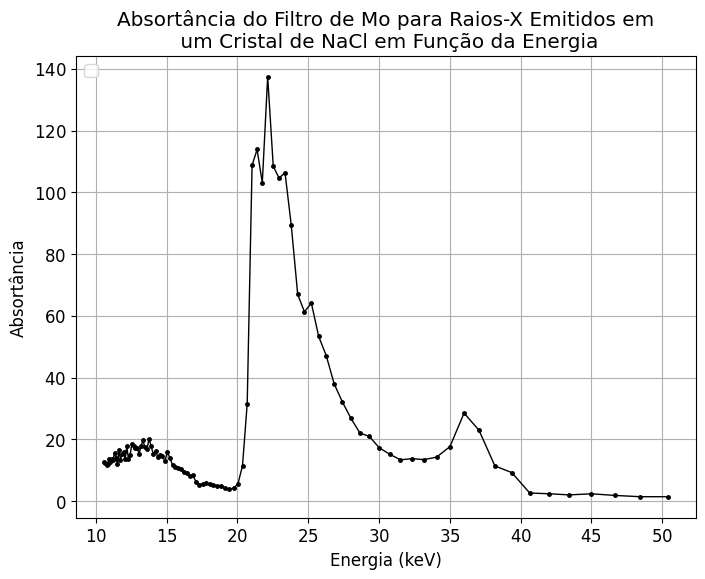

In [21]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)

# plot dos pontos:
# grafico3 = grafico.plot(gauss_nacl_x, gauss_nacl_y, marker = '.', markersize=5, color = 'blue', linewidth = 1)
# grafico3 = grafico.plot(gauss_nacl_x, gauss_nacl_sem_y, marker = '.', markersize=5, color = 'red', linewidth = 1)
grafico3 = grafico.plot(gauss_nacl_x_e, gauss_nacl_y_abs, marker = '.', markersize=5, color = 'black', linewidth = 1)



# plot do ajuste


grafico.grid(True)
grafico.set_xlabel('Energia (keV)') # eixo x
grafico.set_ylabel('Absortância') # eixo y
grafico.set_title('Absortância do Filtro de Mo para Raios-X Emitidos em\n um Cristal de NaCl em Função da Energia') #título
grafico.legend(loc = 'upper left', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()


In [8]:
teste_x = np.flip(gauss_nacl_x_e[16:42])
teste_x, y_ln_a[16:42]

(array([19.12611843, 19.4190737 , 19.721204  , 20.03294621, 20.35476543,
        20.68715723, 21.03065025, 21.38580894, 21.75323669, 22.13357925,
        22.52752846, 22.93582651, 23.35927055, 23.79871789, 24.25509179,
        24.72938793, 25.22268163, 25.73613601, 26.27101111, 26.82867419,
        27.41061143, 28.01844109, 28.65392857, 29.31900347, 30.01577917,
        30.74657524]),
 array([2.7227806 , 2.84925252, 3.04226209, 3.09320953, 3.28811639,
        3.46976338, 3.63768935, 3.85306366, 3.97681008, 4.16042239,
        4.11647548, 4.20400352, 4.49273572, 4.66678503, 4.65043163,
        4.68634348, 4.92326735, 4.63579032, 4.73527466, 4.689092  ,
        3.45319079, 2.44144708, 1.72256353, 1.43884586, 1.33284493,
        1.44450481]))

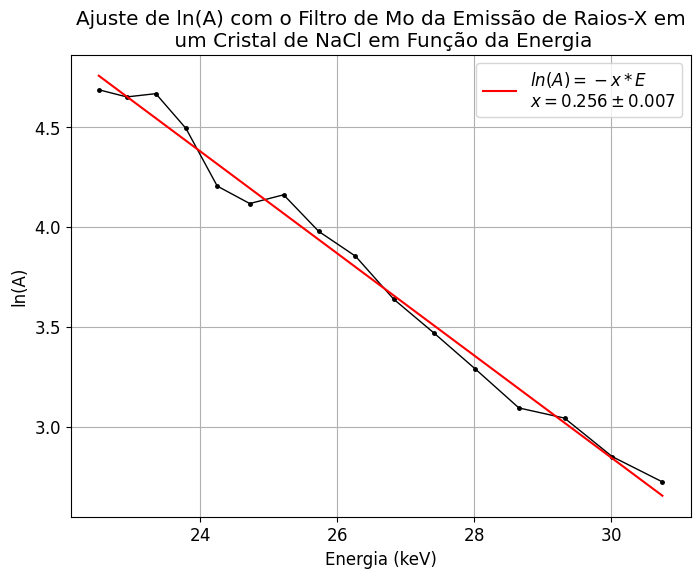

In [20]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
def func_plot(dados_x, dados_y, color_plot):
    par = func_fit(dados_x, dados_y)
    x_model = np.linspace(min(dados_x), max(dados_x))  
    y_model = func(x_model, par[0][0], par[0][1])
    grafico.plot(x_model, y_model, color = color_plot, label = f'$ln(A) = -x*E$\n$x = {par[0][0]:.3} \pm {par[1][0]:.1}$')

# plot dos pontos:
# grafico3 = grafico.plot(gauss_nacl_x, gauss_nacl_y, marker = '.', markersize=5, color = 'blue', linewidth = 1)
# grafico3 = grafico.plot(gauss_nacl_x, gauss_nacl_sem_y, marker = '.', markersize=5, color = 'red', linewidth = 1)
grafico3 = grafico.plot(gauss_nacl_x_e[16:32], y_ln_a[16:32], marker = '.', markersize=5, color = 'black', linewidth = 1)



# plot do ajuste
func_plot(np.flip(gauss_nacl_x_e[16:32]), np.flip(y_ln_a[16:32]), 'red')

grafico.grid(True)
grafico.set_xlabel('Energia (keV)') # eixo x
grafico.set_ylabel('ln(A)') # eixo y
grafico.set_title('Ajuste de ln(A) com o Filtro de Mo da Emissão de Raios-X em\n um Cristal de NaCl em Função da Energia') #título
grafico.legend(loc = 'upper right', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()


In [10]:
np.flip(gauss_nacl_x_e[16:42]), np.flip(y_ln_a[16:42])

(array([19.12611843, 19.4190737 , 19.721204  , 20.03294621, 20.35476543,
        20.68715723, 21.03065025, 21.38580894, 21.75323669, 22.13357925,
        22.52752846, 22.93582651, 23.35927055, 23.79871789, 24.25509179,
        24.72938793, 25.22268163, 25.73613601, 26.27101111, 26.82867419,
        27.41061143, 28.01844109, 28.65392857, 29.31900347, 30.01577917,
        30.74657524]),
 array([1.44450481, 1.33284493, 1.43884586, 1.72256353, 2.44144708,
        3.45319079, 4.689092  , 4.73527466, 4.63579032, 4.92326735,
        4.68634348, 4.65043163, 4.66678503, 4.49273572, 4.20400352,
        4.11647548, 4.16042239, 3.97681008, 3.85306366, 3.63768935,
        3.46976338, 3.28811639, 3.09320953, 3.04226209, 2.84925252,
        2.7227806 ]))